# Model Free Prediction
 
Sungchul Lee 

# How to run these slides yourself

**Setup python environment**

- [Install RISE for an interactive presentation viewer](https://github.com/damianavila/RISE)

# Model vs Model-free

$$
\begin{array}{llllll}
\mbox{Model}&\quad\Rightarrow\quad&\mbox{Model-free}\\
\mbox{Based on $P_{ss'}^a$}&\quad\Rightarrow\quad&\mbox{Based on Samples}\\
V&\quad\Rightarrow\quad&Q\\
\mbox{Greedy}&\quad\Rightarrow\quad&\mbox{$\varepsilon$-Greedy}\\
\end{array}
$$

# Use $Q$ instead of $V$ if don't know the model

##### Model

If we know $R_s^a$, $P_{ss'}^a$, and $V$, and if we are at state $s$, our next action is
$$
\mbox{argmax}_a Q(s,a) \quad =\quad \mbox{argmax}_a\left(R_s^a + \gamma * \sum_{s'} P_{ss'}^a * V(s')\right) 
$$

##### Model-free

In reality, typically we don't know $P_{ss'}^a$.
So, we cannot decide our next action based on $V$.
That is why we use $Q$, not $V$.



# Use $\varepsilon$-greedy policy update instead of greedy policy update

##### Model
If we know $R_s^a$, $P_{ss'}^a$, and $V$, every states $s$ are counted.

##### Model-free
- In reality, typically we don't know $P_{ss'}^a$.
- So, we take samples.
- If we update policy greedily, we may miss good regions in state space.
- That is why we use $\varepsilon$-greedy policy update instead of greedy policy update.

##### $\varepsilon$-greedy policy update
- Update $\varepsilon$-greedy policy using udated $Q$
$$
\pi(a|s)=\left\{\begin{array}{ll}
\frac{\varepsilon}{m}+(1-\varepsilon)&\mbox{if}\ a=\mbox{argmax}_{a'}Q(s,a')\\
\frac{\varepsilon}{m}&\mbox{otherwise}
\end{array}\right.
$$
where $m$ is the number of actions.
- Choose action using updated $\varepsilon$-greedy policy 

# On and Off-Policy Learning



##### On-policy learning

- “Learn on the job”
- Learn about policy $\pi$ from experience sampled from $\pi$


##### Off-policy learning

- “Look over someone’s shoulder”
- Learn about policy $\pi$ from experience sampled from $\mu$

\begin{array}{ccc}\hline
\mbox{Prediction (on-policy)}&\mbox{Control (on-policy)}&\mbox{Control (off-policy)}\\\hline
\mbox{MC}&\mbox{MC}\\
\mbox{TD}&\mbox{SARSA}&\mbox{Q-learnig}\\
\mbox{TD($\lambda$)}&\mbox{SARSA($\lambda$)}\\\hline
\end{array}

# Monte-Carlo Policy Evaluation

<div align="center"><img src="img/Screen Shot 2019-01-28 at 12.39.39 PM.png" width="50%"></div>

Silver
[4](https://www.youtube.com/watch?v=PnHCvfgC_ZA&list=PL7-jPKtc4r78-wCZcQn5IqyuWhBZ8fOxT&index=4) 
[pdf](http://localhost:8888/notebooks/Dropbox/Paper/Reinforcement_Learning_by_David_Silver_4.pdf)

<div align="center"><img src="img/Screen Shot 2019-01-28 at 12.40.02 PM.png" width="50%"></div>

Silver
[4](https://www.youtube.com/watch?v=PnHCvfgC_ZA&list=PL7-jPKtc4r78-wCZcQn5IqyuWhBZ8fOxT&index=4) 
[pdf](http://localhost:8888/notebooks/Dropbox/Paper/Reinforcement_Learning_by_David_Silver_4.pdf)

<div align="center"><img src="img/Screen Shot 2019-01-28 at 12.40.14 PM.png" width="50%"></div>

Silver
[4](https://www.youtube.com/watch?v=PnHCvfgC_ZA&list=PL7-jPKtc4r78-wCZcQn5IqyuWhBZ8fOxT&index=4) 
[pdf](http://localhost:8888/notebooks/Dropbox/Paper/Reinforcement_Learning_by_David_Silver_4.pdf)

In [35]:
# Every-Visit Monte-Carlo Policy Evaluation

# import libraries
import numpy as np

# set parameters ###############################################################
epoch = 100000
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N_STATES = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
N_ACTIONS = len(actions)

# transition probabilities
P = np.empty((N_STATES, N_ACTIONS, N_STATES))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((N_STATES, N_ACTIONS)) 
R[3,:] = 1.
R[6,:] = -1.
    
# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 1: 
    # random policy
    policy = 0.25*np.ones((N_STATES, N_ACTIONS))
elif 1: 
    # optimal policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((N_STATES, N_ACTIONS))
    policy = policy / np.sum(policy, axis=1).reshape((N_STATES,1))

# Every-Visit Monte-Carlo Policy Evaluation
# n_visits records number of visits for each state
# cum_gains records cumulative gains, i.e., sum of gains for each state
# where
# gain = reward + gamma * next_reward + gamma^2 * ...
n_visits = np.zeros(N_STATES)
cum_gains = np.zeros(N_STATES)
for _ in range(epoch):
    # simulation_history records visited states including the terminal states 3 and 6
    # reward_history records occured rewards including final rewards 1. and -1. 
    simulation_history = []
    reward_history = []

    # indicate game is not over yet
    done = False
    
    # choose initial state randomly, not from 3 or 6
    s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])  
    
    while not done:
        # choose action using current policy
        a = np.random.choice(actions, p=policy[s, :])
        simulation_history.append(s)
        reward_history.append(R[s,a])
        
        # choose next state using transition probabilities
        s1 = np.random.choice(states, p=P[s, a, :])

        if s1 == 3:
            # if game is over, 
            # ready to break while loop by letting done = True
            # append end result to simulation_history 
            done = True
            simulation_history.append(s1)
            reward_history.append(1.)
        elif s1 == 6:
            # if game is over, 
            # ready to break while loop by letting done = True
            # append end result to simulation_history 
            done = True
            simulation_history.append(s1)
            reward_history.append(-1.)
        else:
            # if game is not over, continue playing game
            s = s1

    # reward_history records occured rewards including final rewards 1 and -1  
    simulation_history = np.array(simulation_history)
    reward_history = np.array(reward_history)
    n = len(reward_history)
    
    # this for loop makes reward_history record occured gains instead
    # where
    # gain = reward + gamma * next_reward + gamma^2 * ...
    for i, reward in enumerate(reward_history[:-1][::-1]): 
        reward_history[n-i-2] = reward + gamma * reward_history[n-i-2+1]
        
    # update n_visits and cum_gains     
    for i in range(N_STATES):
        n_visits[i] += np.sum(simulation_history==i) 
        cum_gains[i] += np.sum(reward_history[simulation_history==i]) 
                        
V = cum_gains / (n_visits + 1.0e-8) 
print(V)

[-0.49363669 -0.28119021  0.00498441  1.         -0.64746843 -0.61379221
 -1.         -0.74886505 -0.79717737 -0.79298689 -0.91984239]


In [33]:
# Every-Visit Monte-Carlo Policy Evaluation

# import libraries
import numpy as np

# set parameters ###############################################################
epoch = 10000
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N_STATES = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
N_ACTIONS = len(actions)

# transition probabilities
P = np.empty((N_STATES, N_ACTIONS, N_STATES))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((N_STATES, N_ACTIONS)) 
R[3,:] = 1.
R[6,:] = -1.
    
# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 1: 
    # random policy
    policy = 0.25*np.ones((N_STATES, N_ACTIONS))
elif 1: 
    # optimal policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((N_STATES, N_ACTIONS))
    policy = policy / np.sum(policy, axis=1).reshape((N_STATES,1))

# Every-Visit Monte-Carlo Policy Evaluation
# n_visits records number of visits for each state
# cum_gains records cumulative gains, i.e., sum of gains for each state
# where
# gain = reward + gamma * next_reward + gamma^2 * ...
n_visits = np.zeros((N_STATES, N_ACTIONS))
cum_gains = np.zeros((N_STATES, N_ACTIONS))
for _ in range(epoch):
    # simulation_history records visited states and actions including the terminal states 3 and 6
    # reward_history records occured rewards including final rewards 1 and -1 
    simulation_history = []
    reward_history = []

    # indicate game is not over yet
    done = False
    
    # choose initial state randomly, not from 3 or 6
    s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])  
    
    while not done:
        # choose action using current policy
        a = np.random.choice(actions, p=policy[s, :])
        simulation_history.append((s,a))
        reward_history.append(R[s,a])
        
        # choose next state using transition probabilities
        s1 = np.random.choice(states, p=P[s, a, :])

        if s1 == 3:
            # if game is over, 
            # ready to break while loop by letting done = True
            # append end result to simulation_history 
            done = True
            simulation_history.append((s1,0))
            reward_history.append(1.)
        elif s1 == 6:
            # if game is over, 
            # ready to break while loop by letting done = True
            # append end result to simulation_history 
            done = True
            simulation_history.append((s1,0))
            reward_history.append(-1.)
        else:
            # if game is not over, continue playing game
            s = s1

    # reward_history records occured rewards including final rewards 1 and -1  
    reward_history = np.array(reward_history)
    n = len(reward_history)
    
    # this for loop makes reward_history record occured gains instead
    # where
    # gain = reward + gamma * next_reward + gamma^2 * ...
    for i, reward in enumerate(reward_history[:-1][::-1]): 
        reward_history[n-i-2] = reward + gamma * reward_history[n-i-2+1]
        
    # update n_visits and cum_gains 
    for i, (s, a) in enumerate(simulation_history): 
        n_visits[s, a] += 1.
        cum_gains[s, a] += reward_history[i] 
                        
Q = cum_gains / (n_visits + 1.0e-8) 
print(Q)

[[-0.5467029  -0.38756988 -0.49792311 -0.62009316]
 [-0.50234235 -0.07255659 -0.32065238 -0.32720903]
 [-0.31123627  0.71772204  0.04662636 -0.44366402]
 [ 1.          0.          0.          0.        ]
 [-0.66565961 -0.65906895 -0.56107731 -0.75832827]
 [-0.584708   -0.88541716 -0.18605246 -0.81204098]
 [-1.          0.          0.          0.        ]
 [-0.77285161 -0.80592234 -0.69809236 -0.77995647]
 [-0.79357108 -0.81371954 -0.79516765 -0.80165741]
 [-0.80616646 -0.89629524 -0.67089489 -0.82957876]
 [-0.84974336 -0.93675267 -0.98548375 -0.9046855 ]]


<div align="center"><img src="img/Screen Shot 2019-01-28 at 2.49.15 PM.png" width="50%"></div>

Silver
[4](https://www.youtube.com/watch?v=PnHCvfgC_ZA&list=PL7-jPKtc4r78-wCZcQn5IqyuWhBZ8fOxT&index=4) 
[pdf](http://localhost:8888/notebooks/Dropbox/Paper/Reinforcement_Learning_by_David_Silver_4.pdf)

<div align="center"><img src="img/Screen Shot 2019-01-28 at 2.49.39 PM.png" width="50%"></div>

Silver
[4](https://www.youtube.com/watch?v=PnHCvfgC_ZA&list=PL7-jPKtc4r78-wCZcQn5IqyuWhBZ8fOxT&index=4) 
[pdf](http://localhost:8888/notebooks/Dropbox/Paper/Reinforcement_Learning_by_David_Silver_4.pdf)

# Temporal-Difference (TD)

##### MC
$$
V(S_t)\quad\leftarrow\quad V(S_t)+\alpha(\color{red}{G_t}-V(S_t))
$$
- Use actual return $G_t$
- Have to wait the full episode finishes to get $G_t$

##### TD
$$
V(S_t)\quad\leftarrow\quad V(S_t)+\alpha(\color{red}{R_{t+1}+\gamma V(S_{t+1})}-V(S_t))
$$
$$
Q(S_t,a_t)\quad\leftarrow\quad Q(S_t,a_t)+\alpha(\color{red}{R_{t+1}+\gamma Q(S_{t+1},a_{t+1})}-Q(S_t,a_t))
$$
- Use estimated return $R_{t+1}+\gamma V(S_{t+1})$
- No need to wait
- $R_{t+1}+\gamma V(S_{t+1})$ is called TD target 
- $\delta_t=R_{t+1}+\gamma V(S_{t+1})-V(S_t)$ is called TD error

In [10]:
# TD - V

# import libraries
import numpy as np

# set parameters ###############################################################
epoch = 1000
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N_STATES = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
N_ACTIONS = len(actions)

# transition probabilities
P = np.empty((N_STATES, N_ACTIONS, N_STATES))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((N_STATES, N_ACTIONS)) 
R[3,:] = 1.
R[6,:] = -1.
    
# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 1: 
    # random policy
    policy = 0.25*np.ones((N_STATES, N_ACTIONS))
elif 1: 
    # optimal policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((N_STATES, N_ACTIONS))
    policy = policy / np.sum(policy, axis=1).reshape((N_STATES,1))

# TD
alpha = 0.01

V = np.zeros(N_STATES)
V[3] = 1.
V[6] = -1.
for _ in range(epoch):

    # indicate game is not over yet
    done = False
    
    # choose initial state randomly, not from 3 or 6
    s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])  
    
    while not done:
        # choose action using current policy
        a = np.random.choice(actions, p=policy[s, :])
        
        # choose next state using transition probabilities
        s1 = np.random.choice(states, p=P[s, a, :])
        
        # TD
        # V(S_t)\leftarrow V(S_t)+\alpha(R_{t+1}+\gamma V(S_{t+1})-V(S_t))
        V[s] = V[s] + alpha * (R[s,a] + gamma * V[s1] - V[s]) 

        if (s1 == 3) or (s1 == 6):
            # if game is over, 
            # ready to break while loop by letting done = True
            done = True
        else:
            # if game is not over, continue playing game
            s = s1

print(V)

[ 0.84940697  0.88483161  0.92154646  1.          0.81735459  0.64389908
 -1.          0.77943876  0.74357923  0.70158821  0.52181033]


In [37]:
# TD - Q

# import libraries
import numpy as np

# set parameters ###############################################################
epoch = 1000
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N_STATES = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
N_ACTIONS = len(actions)

# transition probabilities
P = np.empty((N_STATES, N_ACTIONS, N_STATES))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((N_STATES, N_ACTIONS)) 
R[3,:] = 1.
R[6,:] = -1.
    
# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 1: 
    # random policy
    policy = 0.25*np.ones((N_STATES, N_ACTIONS))
elif 1: 
    # optimal policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((N_STATES, N_ACTIONS))
    policy = policy / np.sum(policy, axis=1).reshape((N_STATES,1))

# TD
alpha = 0.01

Q = np.zeros((N_STATES, N_ACTIONS))
Q[3, :] = 1.
Q[6, :] = -1.
for _ in range(epoch):

    # indicate game is not over yet
    done = False
    
    # choose initial state randomly, not from 3 or 6
    s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10]) 
    
    # choose action using current policy
    a = np.random.choice(actions, p=policy[s, :])
    
    while not done:
        # choose next state using transition probabilities
        s1 = np.random.choice(states, p=P[s, a, :])
        
        # choose action using current policy
        a1 = np.random.choice(actions, p=policy[s1, :])
        
        # TD
        # V(S_t)\leftarrow V(S_t)+\alpha(R_{t+1}+\gamma V(S_{t+1})-V(S_t))
        # V[s] = V[s] + alpha * (R[s,a] + gamma * V[s1] - V[s])
        Q[s,a] = Q[s,a] + alpha * (R[s,a] + gamma * Q[s1,a1] - Q[s,a])

        if (s1 == 3) or (s1 == 6):
            # if game is over, 
            # ready to break while loop by letting done = True
            done = True
        else:
            # if game is not over, continue playing game
            s = s1
            a = a1

print(Q)

[[-0.47610969 -0.33185631 -0.44667549 -0.5469873 ]
 [-0.43078449 -0.01587688 -0.23105415 -0.25712342]
 [-0.25512094  0.76836435  0.15604923 -0.39466806]
 [ 1.          1.          1.          1.        ]
 [-0.61456105 -0.61370986 -0.50298751 -0.69513417]
 [-0.58788576 -0.87999203 -0.11300855 -0.81714052]
 [-1.         -1.         -1.         -1.        ]
 [-0.70267953 -0.74960234 -0.64324271 -0.71996568]
 [-0.72866804 -0.79364439 -0.77943768 -0.77436362]
 [-0.77948784 -0.8656124  -0.6721209  -0.78842776]
 [-0.82484032 -0.92084568 -0.97431983 -0.90022607]]


# Bias/Variance Trade-Off

### Bias
- Return $G_t = R_{t+1} + \gamma R_{t+2} + \ldots + \gamma^{T-(t+1)}R_T$ is unbiased estimate of $v_\pi(S_t)$
- True TD target $R_{t+1} + \gamma v_\pi (S_{t+1})$ is unbiased estimate of $v_\pi(S_t)$
- TD target $R_{t+1} + \gamma V(S_{t+1})$ is biased estimate of $v_\pi(S_t)$

### Variance Trade-Off
- TD target is much lower variance than the return:
- Return depends on many random actions, transitions, rewards
- TD target depends on one random action, transition, reward

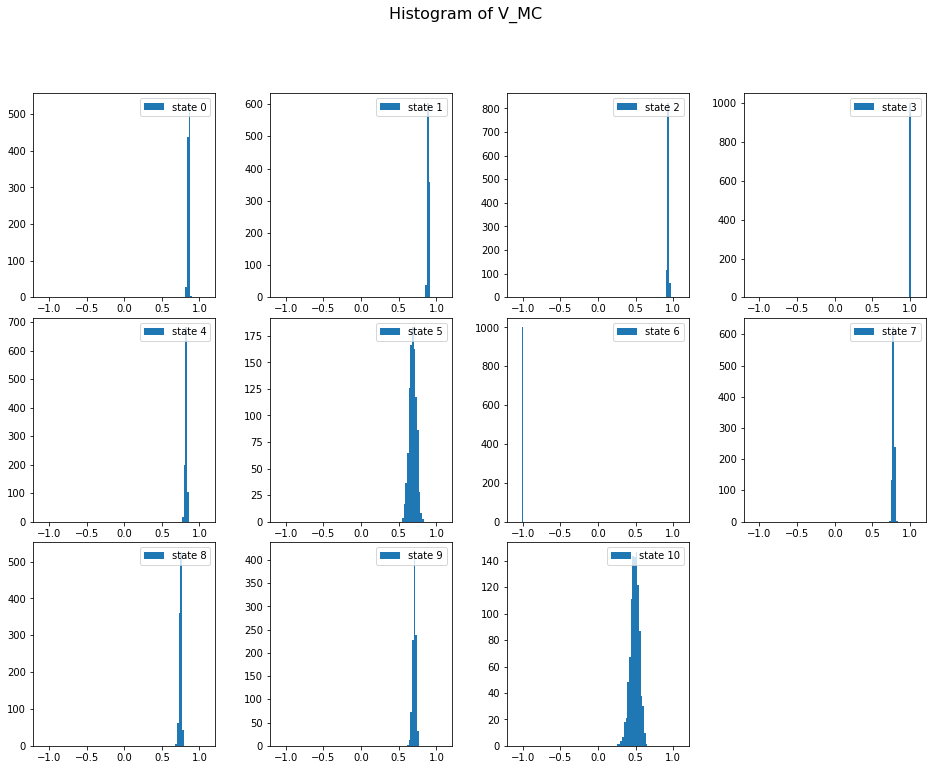

In [26]:
# Every-Visit Monte-Carlo Policy Evaluation

# import libraries
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
epoch = 1000
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N_STATES = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
N_ACTIONS = len(actions)

# transition probabilities
P = np.empty((N_STATES, N_ACTIONS, N_STATES))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((N_STATES, N_ACTIONS)) 
R[3,:] = 1.
R[6,:] = -1.
    
# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 0: 
    # random policy
    policy = 0.25*np.ones((N_STATES, N_ACTIONS))
elif 1: 
    # optimal policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((N_STATES, N_ACTIONS))
    policy = policy / np.sum(policy, axis=1).reshape((N_STATES,1))

# Every-Visit Monte-Carlo Policy Evaluation
def V_MC():
    # n_visits records number of visits for each state
    # cum_gains records cumulative gains, i.e., sum of gains for each state
    # where
    # gain = reward + gamma * next_reward + gamma^2 * ...
    n_visits = np.zeros(N_STATES)
    cum_gains = np.zeros(N_STATES)
    for _ in range(epoch):
        # simulation_history records visited states including the terminal states 3 and 6
        # reward_history records occured rewards including final rewards 1 and -1 
        simulation_history = []
        reward_history = []

        # indicate game is not over yet
        done = False

        # choose initial state randomly, not from 3 or 6
        s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])  

        while not done:
            # choose action using current policy
            a = np.random.choice(actions, p=policy[s, :])
            simulation_history.append(s)
            reward_history.append(R[s,a])

            # choose next state using transition probabilities
            s1 = np.random.choice(states, p=P[s, a, :])

            if s1 == 3:
                # if game is over, 
                # ready to break while loop by letting done = True
                # append end result to simulation_history 
                done = True
                simulation_history.append(s1)
                reward_history.append(1)
            elif s1 == 6:
                # if game is over, 
                # ready to break while loop by letting done = True
                # append end result to simulation_history 
                done = True
                simulation_history.append(s1)
                reward_history.append(-1)
            else:
                # if game is not over, continue playing game
                s = s1

        # reward_history records occured rewards including final rewards 1 and -1  
        simulation_history = np.array(simulation_history)
        reward_history = np.array(reward_history)
        n = len(reward_history)

        # this for loop makes reward_history record occured gains instead
        # where
        # gain = reward + gamma * next_reward + gamma^2 * ...
        for i, reward in enumerate(reward_history[:-1][::-1]): 
            reward_history[n-i-2] = reward + gamma * reward_history[n-i-2+1]

        # update n_visits and cum_gains     
        for i in range(N_STATES):
            n_visits[i] += np.sum(simulation_history==i) 
            cum_gains[i] += np.sum(reward_history[simulation_history==i])

    V = cum_gains / (n_visits + 1.0e-8) 
    return V


V_history = np.empty((1000, N_STATES))
for i in range(1000):
    V_history[i, :] = V_MC()
    
fig = plt.figure(figsize=(16, 12))
fig.subplots_adjust(hspace=0.1, wspace=0.3)
fig.suptitle("Histogram of V_MC", fontsize=16)

for s in range(N_STATES):
    ax = fig.add_subplot(3, 4, s + 1)
    bins = np.linspace(-1.1,1.1,100)
    label = "state {}".format(str(s))
    ax.hist(V_history[:, s], bins=bins, label=label)
    ax.legend(loc='upper right')

plt.show()  

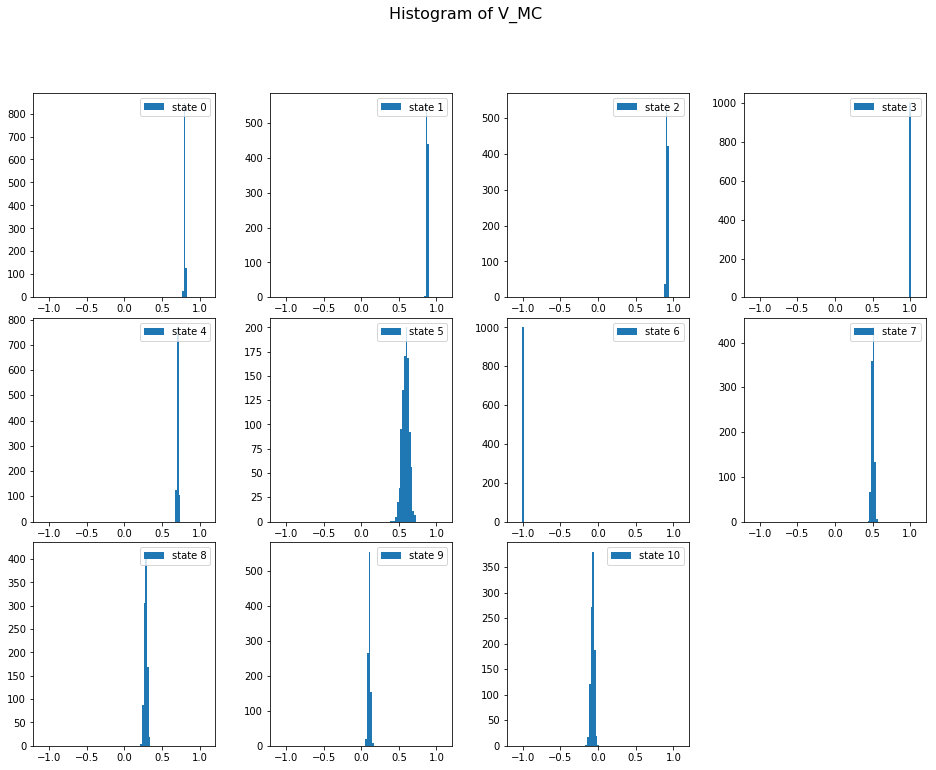

In [27]:
# TD

# import libraries
import numpy as np

# set parameters ###############################################################
epoch = 1000
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N_STATES = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
N_ACTIONS = len(actions)

# transition probabilities
P = np.empty((N_STATES, N_ACTIONS, N_STATES))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((N_STATES, N_ACTIONS)) 
R[3,:] = 1.
R[6,:] = -1.
    
# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 0: 
    # random policy
    policy = 0.25*np.ones((N_STATES, N_ACTIONS))
elif 1: 
    # optimal policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((N_STATES, N_ACTIONS))
    policy = policy / np.sum(policy, axis=1).reshape((N_STATES,1))

# TD
def V_TD():
    alpha = 0.01

    V = np.zeros(N_STATES)
    V[3] = 1
    V[6] = -1
    for _ in range(epoch):

        # indicate game is not over yet
        done = False

        # choose initial state randomly, not from 3 or 6
        s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])  

        while not done:
            # choose action using current policy
            a = np.random.choice(actions, p=policy[s, :])

            # choose next state using transition probabilities
            s1 = np.random.choice(states, p=P[s, a, :])

            # TD
            # V(S_t)\leftarrow V(S_t)+\alpha(R_{t+1}+\gamma V(S_{t+1})-V(S_t))
            V[s] = V[s] + alpha * (R[s,a] + gamma * V[s1] - V[s]) 

            if (s1 == 3) or (s1 == 6):
                # if game is over, 
                # ready to break while loop by letting done = True
                done = True
            else:
                # if game is not over, continue playing game
                s = s1

    return V


V_history = np.empty((1000, N_STATES))
for i in range(1000):
    V_history[i, :] = V_TD()
    
fig = plt.figure(figsize=(16, 12))
fig.subplots_adjust(hspace=0.1, wspace=0.3)
fig.suptitle("Histogram of V_TD", fontsize=16)

for s in range(N_STATES):
    ax = fig.add_subplot(3, 4, s + 1)
    bins = np.linspace(-1.1,1.1,100)
    label = "state {}".format(str(s))
    ax.hist(V_history[:, s], bins=bins, label=label)
    ax.legend(loc='upper right')

plt.show()  

# TD($\lambda$)

### TD
$$
V(S_t)\quad\leftarrow\quad V(S_t)+\alpha\delta_t 
$$
- for each step TD error $\delta_t=R_{t+1}+\gamma V(S_{t+1})-V(S_t)$ update only one $V(s)$, i.e., $V(S_t)$

### TD($\lambda$)
$$\begin{array}{lll}
E_0(s)&=&0\\
E_t(s)&=&\gamma\lambda E_{t-1}(s)+1(S_t=s)\\
V(s)&\leftarrow&V(s)+\alpha\delta_t \color{red}{E_t(s)}
\end{array}$$

- $E_t(s)$ is called Eligibility Trace

- for each step TD error $\delta_t=R_{t+1}+\gamma V(S_{t+1})-V(S_t)$ update all $V(s)$ using eligibility trace $E_t(s)$

$$\begin{array}{lll}
E_0(s,a)&=&0\\
E_t(s,a)&=&\gamma\lambda E_{t-1}(s,a)+1(S_t=s,A_t=a)\\
Q(s,a)&\leftarrow&Q(s,a)+\alpha\delta_t \color{red}{E_t(s,a)}
\end{array}$$

- $E_t(s,a)$ is called Eligibility Trace

- for each step TD error $\delta_t=R_{t+1}+\gamma Q(S_{t+1},A_{t+1})-Q(S_t,A_t)$ update all $Q(s,t)$ using eligibility trace $E_t(s)$

In [2]:
# TD(la) - V

# import libraries
import numpy as np

# set parameters ###############################################################
epoch = 1000
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N_STATES = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
N_ACTIONS = len(actions)

# transition probabilities
P = np.empty((N_STATES, N_ACTIONS, N_STATES))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((N_STATES, N_ACTIONS)) 
R[3,:] = 1.
R[6,:] = -1.
    
# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 1: 
    # random policy
    policy = 0.25*np.ones((N_STATES, N_ACTIONS))
elif 1: 
    # optimal policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((N_STATES, N_ACTIONS))
    policy = policy / np.sum(policy, axis=1).reshape((N_STATES,1))

# TD(la)
alpha = 0.01
la = 0.1

V = np.zeros(N_STATES)
V[3] = 1.
V[6] = -1.

# eligibility trace
# E_0(s)=0
E =  np.zeros(N_STATES) 
for _ in range(epoch):

    # indicate game is not over yet
    done = False
    
    # choose initial state randomly, not from 3 or 6
    s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10]) 
    
    # E_t(s) = \gamma\lambda E_{t-1}(s)+1(S_t=s)    
    E = gamma * la * E
    E[s] += 1
    
    while not done:
        # choose action using current policy
        a = np.random.choice(actions, p=policy[s, :])
        
        # choose next state using transition probabilities
        s1 = np.random.choice(states, p=P[s, a, :])
        
        # TD(la)
        # V(S_t)\leftarrow V(S_t)+\alpha(R_{t+1}+\gamma V(S_{t+1})-V(S_t)) E_t(s)
        delta = R[s,a] + gamma * V[s1] - V[s]
        for s2 in states: 
            if (s2!=3) and (s2!=6):
                V[s2] = V[s2] + alpha * delta * E[s2] 

        if (s1 == 3) or (s1 == 6):
            # if game is over, 
            # ready to break while loop by letting done = True
            done = True
        else:
            # if game is not over, continue playing game
            s = s1
            
            # E_t(s) = \gamma\lambda E_{t-1}(s)+1(S_t=s)    
            E = gamma * la * E
            E[s] += 1.

print(V)

[-0.35923685 -0.15463591  0.08569467  1.         -0.51637213 -0.47188244
 -1.         -0.59896235 -0.64886068 -0.66913671 -0.84581493]


In [3]:
# TD(la) - Q

# import libraries
import numpy as np

# set parameters ###############################################################
epoch = 10000
alpha = 0.01
la = 0.1
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N_STATES = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
N_ACTIONS = len(actions)

# transition probabilities
P = np.empty((N_STATES, N_ACTIONS, N_STATES))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((N_STATES, N_ACTIONS)) 
R[3,:] = 1.
R[6,:] = -1.
    
# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 1: 
    # random policy
    policy = 0.25*np.ones((N_STATES, N_ACTIONS))
elif 1: 
    # optimal policy 
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((N_STATES, N_ACTIONS))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((N_STATES, N_ACTIONS))
    policy = policy / np.sum(policy, axis=1).reshape((N_STATES,1))

" TD(la) "

# Q
Q = np.zeros((N_STATES, N_ACTIONS))
Q[3,:] = 1.
Q[6,:] = -1.

# eligibility trace
# E_0(s,a)=0
E =  np.zeros((N_STATES, N_ACTIONS)) 

for _ in range(epoch):

    # indicate game is not over yet
    done = False
    
    # choose initial state randomly, not from 3 or 6
    s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10]) 
    
    # choose action using current policy
    a = np.random.choice(actions, p=policy[s, :])
    
    # E_t(s2,a2) = \gamma\lambda E_{t-1}(s2,a2)+1(s2=s,a2=a)    
    E = gamma * la * E
    E[s,a] += 1.
    
    while not done:
        
        # choose next state using transition probabilities
        s1 = np.random.choice(states, p=P[s, a, :])
        
        # choose action using current policy
        a1 = np.random.choice(actions, p=policy[s1, :])
        
        # TD
        # V(S_t)\leftarrow V(S_t)+\alpha(R_{t+1}+\gamma V(S_{t+1})-V(S_t))
        # V[s] = V[s] + alpha * (R[s,a] + gamma * V[s1] - V[s])
        # TD(lambda)
        delta = R[s,a] + gamma * Q[s1,a1] - Q[s,a]
        for s2 in states:
            if (s2!=3) and (s2!=6):
                for a2 in actions:
                    Q[s2,a2] = Q[s2,a2] + alpha * delta * E[s2,a2]

        if (s1 == 3) or (s1 == 6):
            # if game is over, 
            # ready to break while loop by letting done = True
            done = True
        else:
            # if game is not over, continue playing game
            s = s1
            a = a1
            
            # E_t(s,a) = \gamma\lambda E_{t-1}(s)+1(S_t=s)    
            E = gamma * la * E
            E[s,a] += 1.

print(Q)

[[-0.46905959 -0.31846341 -0.4370555  -0.55149334]
 [-0.42965386 -0.10728225 -0.28342492 -0.26667498]
 [-0.28853779  0.72902271  0.09441897 -0.45228941]
 [ 1.          1.          1.          1.        ]
 [-0.61788721 -0.62228465 -0.49482378 -0.70402419]
 [-0.58385044 -0.92829749 -0.1833864  -0.77951916]
 [-1.         -1.         -1.         -1.        ]
 [-0.71915059 -0.76284053 -0.65111614 -0.74477241]
 [-0.74516016 -0.77649893 -0.78011129 -0.77962827]
 [-0.77015359 -0.8502401  -0.65441893 -0.79531558]
 [-0.81282693 -0.9306029  -0.97724453 -0.89762581]]
